In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

# loading data
 download the dataset from kaggle

In [2]:
df=pd.read_csv("supermarket_sales - Sheet1.csv")

In [3]:
df.head()

,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Date,Time,Payment,cogs,gross margin percentage,gross income,Rating
0,750-67-8428,A,Yangon,Member,Female,Health and beauty,74.69,7,26.1415,548.9715,1/5/2019,13:08,Ewallet,522.83,4.761905,26.1415,9.1
1,226-31-3081,C,Naypyitaw,Normal,Female,Electronic accessories,15.28,5,3.8200,80.2200,3/8/2019,10:29,Cash,76.40,4.761905,3.8200,9.6
2,631-41-3108,A,Yangon,Normal,Male,Home and lifestyle,46.33,7,16.2155,340.5255,3/3/2019,13:23,Credit card,324.31,4.761905,16.2155,7.4
3,123-19-1176,A,Yangon,Member,Male,Health and beauty,58.22,8,23.2880,489.0480,1/27/2019,20:33,Ewallet,465.76,4.761905,23.2880,8.4
4,373-73-7910,A,Yangon,Normal,Male,Sports and travel,86.31,7,30.2085,634.3785,2/8/2019,10:37,Ewallet,604.17,4.761905,30.2085,5.3


# Basic understanding of data
     

In [4]:
# how many column and rows of data 
df.shape

(1000, 17)

Number of rows=1000

Number of column=17

In [5]:
#general information about the data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 17 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Invoice ID               1000 non-null   object 
 1   Branch                   1000 non-null   object 
 2   City                     1000 non-null   object 
 3   Customer type            1000 non-null   object 
 4   Gender                   1000 non-null   object 
 5   Product line             1000 non-null   object 
 6   Unit price               1000 non-null   float64
 7   Quantity                 1000 non-null   int64  
 8   Tax 5%                   1000 non-null   float64
 9   Total                    1000 non-null   float64
 10  Date                     1000 non-null   object 
 11  Time                     1000 non-null   object 
 12  Payment                  1000 non-null   object 
 13  cogs                     1000 non-null   float64
 14  gross margin percentage  

 memory usage : 132.9 kb
 
 7 columns are of float type
 
 1 column is of int type
 
 9 columns are of object type



In [6]:
#identify or count unique values
df.nunique()

Invoice ID                 1000
Branch                        3
City                          3
Customer type                 2
Gender                        2
Product line                  6
Unit price                  943
Quantity                     10
Tax 5%                      990
Total                       990
Date                         89
Time                        506
Payment                       3
cogs                        990
gross margin percentage       1
gross income                990
Rating                       61
dtype: int64

In [7]:
# about statistical summary of data
df.describe()

,Unit price,Quantity,Tax 5%,Total,cogs,gross margin percentage,gross income,Rating
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.00000,1.000000e+03,1000.000000,1000.00000
mean,55.672130,5.510000,15.379369,322.966749,307.58738,4.761905e+00,15.379369,6.97270
std,26.494628,2.923431,11.708825,245.885335,234.17651,6.131498e-14,11.708825,1.71858
min,10.080000,1.000000,0.508500,10.678500,10.17000,4.761905e+00,0.508500,4.00000
25%,32.875000,3.000000,5.924875,124.422375,118.49750,4.761905e+00,5.924875,5.50000
50%,55.230000,5.000000,12.088000,253.848000,241.76000,4.761905e+00,12.088000,7.00000
75%,77.935000,8.000000,22.445250,471.350250,448.90500,4.761905e+00,22.445250,8.50000
max,99.960000,10.000000,49.650000,1042.650000,993.00000,4.761905e+00,49.650000,10.00000


In [8]:
df.describe(include="object")

,Invoice ID,Branch,City,Customer type,Gender,Product line,Date,Time,Payment
count,1000,1000,1000,1000,1000,1000,1000,1000,1000
unique,1000,3,3,2,2,6,89,506,3
top,655-85-5130,A,Yangon,Member,Female,Fashion accessories,2/7/2019,14:42,Ewallet
freq,1,340,340,501,501,178,20,7,345


# Cleaning and transforming the data 

In [9]:
#check the missing values
df.isnull().sum()

Invoice ID                 0
Branch                     0
City                       0
Customer type              0
Gender                     0
Product line               0
Unit price                 0
Quantity                   0
Tax 5%                     0
Total                      0
Date                       0
Time                       0
Payment                    0
cogs                       0
gross margin percentage    0
gross income               0
Rating                     0
dtype: int64

There is no missing value here

In [10]:
 # Do some column convertion the data type of date is object so it needs to be transformed to datetime
df['Date']=pd.to_datetime(df['Date'])

Adding the column which is Month to date

Adding the column which is weekday to date

In [11]:
from datetime import datetime as dt
df["month"]=df.Date.dt.month
df["weekday"]=df.Date.dt.weekday
df.head(5)

,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Date,Time,Payment,cogs,gross margin percentage,gross income,Rating,month,weekday
0,750-67-8428,A,Yangon,Member,Female,Health and beauty,74.69,7,26.1415,548.9715,2019-01-05,13:08,Ewallet,522.83,4.761905,26.1415,9.1,1,5
1,226-31-3081,C,Naypyitaw,Normal,Female,Electronic accessories,15.28,5,3.8200,80.2200,2019-03-08,10:29,Cash,76.40,4.761905,3.8200,9.6,3,4
2,631-41-3108,A,Yangon,Normal,Male,Home and lifestyle,46.33,7,16.2155,340.5255,2019-03-03,13:23,Credit card,324.31,4.761905,16.2155,7.4,3,6
3,123-19-1176,A,Yangon,Member,Male,Health and beauty,58.22,8,23.2880,489.0480,2019-01-27,20:33,Ewallet,465.76,4.761905,23.2880,8.4,1,6
4,373-73-7910,A,Yangon,Normal,Male,Sports and travel,86.31,7,30.2085,634.3785,2019-02-08,10:37,Ewallet,604.17,4.761905,30.2085,5.3,2,4



Decoding the month column as

1: January

2: February

3: March


In [12]:
df["month"]=df["month"].replace({1:"january"})
df["month"]=df["month"].replace({2:"february"})
df["month"]=df["month"].replace({3:"march"})
df.head(2)

,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Date,Time,Payment,cogs,gross margin percentage,gross income,Rating,month,weekday
0,750-67-8428,A,Yangon,Member,Female,Health and beauty,74.69,7,26.1415,548.9715,2019-01-05,13:08,Ewallet,522.83,4.761905,26.1415,9.1,january,5
1,226-31-3081,C,Naypyitaw,Normal,Female,Electronic accessories,15.28,5,3.8200,80.2200,2019-03-08,10:29,Cash,76.40,4.761905,3.8200,9.6,march,4


# Uni-variate analysis

1. Is there any difference in aggregate sales across branches?

A    340
B    332
C    328
Name: Branch, dtype: int64

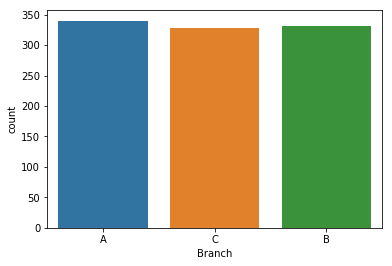

In [13]:
sns.countplot(df['Branch'])
df['Branch'].value_counts()

There is not much difference in sales across the 3 branches of A, B and C. 
The sales in branch A is a bit higher than the rest of the branches.

2.Which is the most pouplar payment method used by customers?

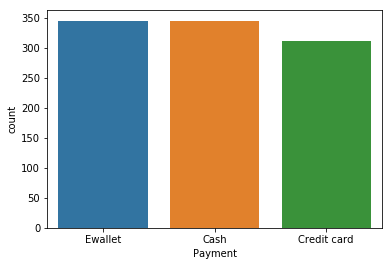

In [14]:
sns.countplot(df['Payment'])

The most popular payment method is in-fact E-wallet and not credit cards.Cash payment is also popular.

# Bi-variant Analysis
3. Which branch is the most profitable?

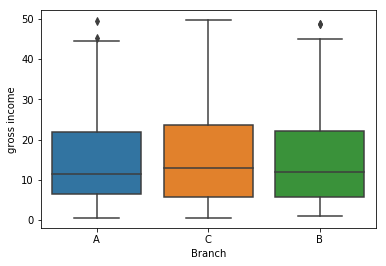

In [15]:
sns.boxplot(x=df['Branch'], y=df['gross income'])

here is not much difference in gross income by branches at an average level. Branch C has a slightly higher income than A or B.

4.Is there any relationship between Gender and Gross income?

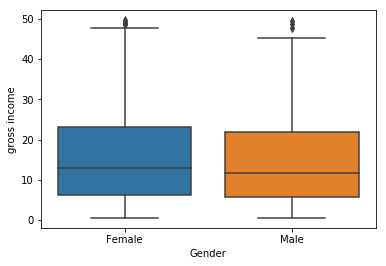

In [16]:
sns.boxplot(x=df['Gender'], y=df['gross income'])

Gross income is similar for both male and female, though female customers spend a bit higher at the 75th percentile.

5. Which product line generates most income?

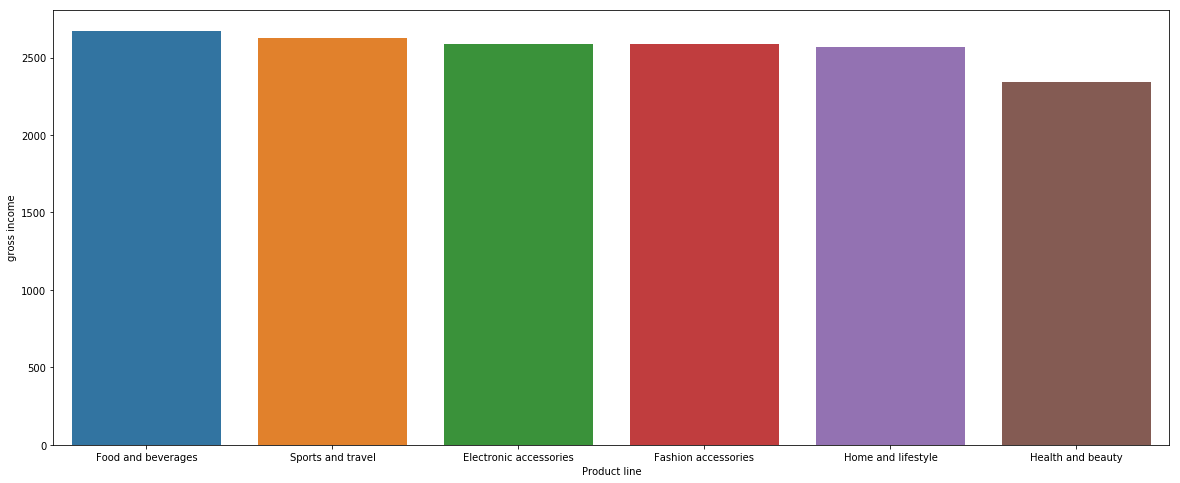

In [17]:
cat=df[["Product line", "gross income"]].groupby(['Product line'], as_index=False).sum().sort_values(by='gross income', ascending=False)
plt.figure(figsize=(20,8))
sns.barplot(x='Product line', y='gross income', data=cat)

Gross income is highest in food and beverage.

6. Is there any time trend in gross income? or the gross income are increasing or decreasing ?

Text(0.5, 1.0, 'Date')

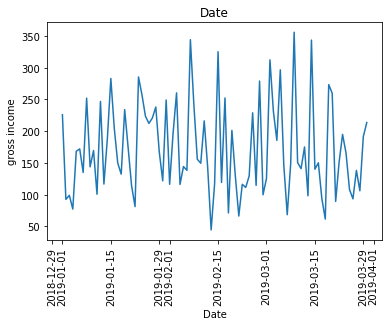

In [18]:
GrossOverDays=df.groupby('Date')['gross income'].sum()
sns.lineplot(x=GrossOverDays.index , y=GrossOverDays.values)
plt.ylabel('gross income')
plt.xticks(rotation=450)
plt.title('Date')

No particular time trend is observed except for some days when the gross income is pretty high or pretty low. Overall it remains at a certain average level.

# correlation analysis

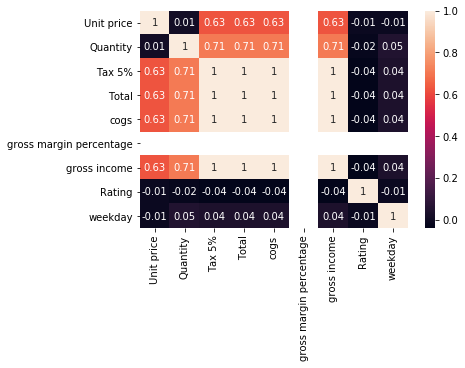

In [19]:
sns.heatmap(np.round(df.corr(),2), annot=True)

6.Which day of the week has maximum sales?

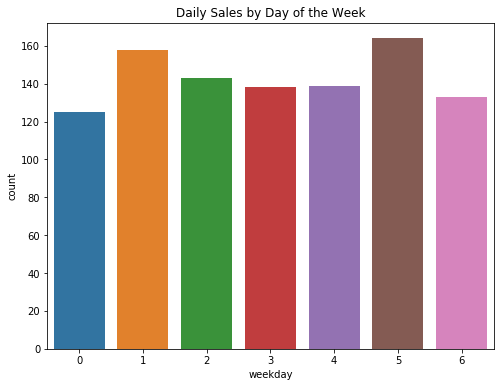

In [20]:
plt.figure(figsize=(8, 6))
plt.title('Daily Sales by Day of the Week')
sns.countplot(df['weekday'])

Sales is highest on Saturdays probably because it is the weekend. Interestingly,Tuesdays is a close second.Mondays is the lowest in sales, probably because it is start of the working week.

7.Which product line should the supermarket focus on?

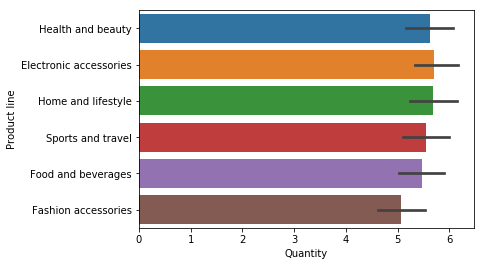

In [22]:
sns.barplot(y = 'Product line', x = 'Quantity', data=df )

8.Which city should be chosen for expansion and which products should it focus on?

(array([ 0. ,  2.5,  5. ,  7.5, 10. , 12.5, 15. , 17.5, 20. ]),
 <a list of 9 Text yticklabel objects>)

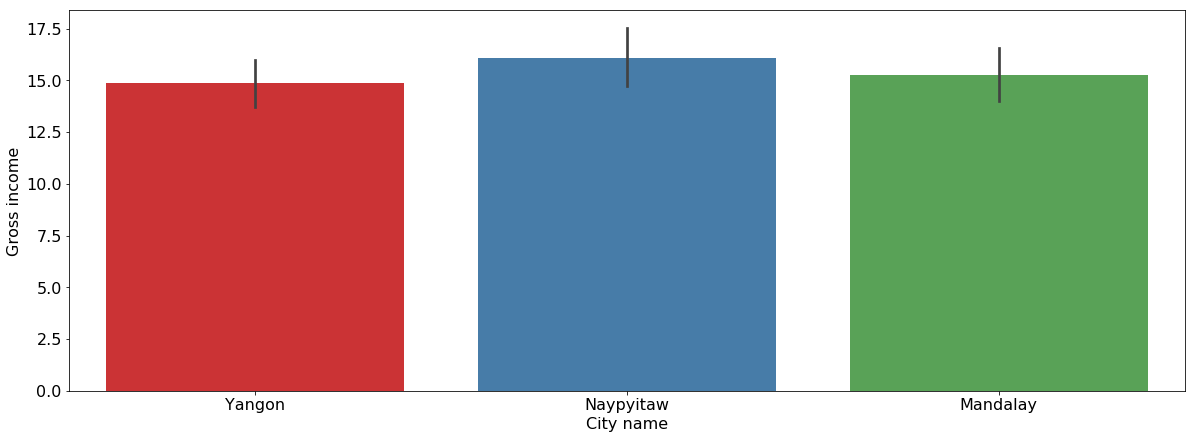

In [21]:
plt.figure(figsize=(20,7))
sns.barplot(df['City'],df['gross income'],palette='Set1')
plt.xlabel('City name',fontsize='16')
plt.xticks(fontsize='16')
plt.ylabel('Gross income',fontsize='16')
plt.yticks(fontsize='16')

It is obvious that Naypyitaw is the most profitable city, hence the expansion plan should be based on this city.

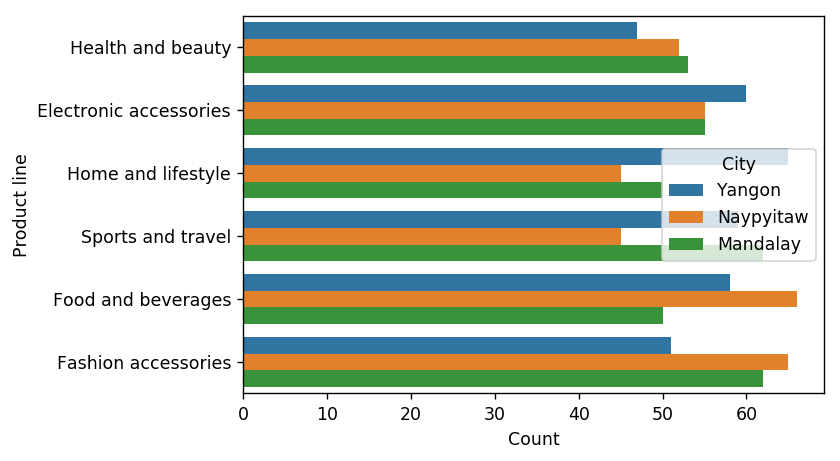

In [23]:
plt.figure(dpi=125)
sns.countplot(y ='Product line', hue = "City", data = df) 
plt.xlabel('Count')
plt.show()

Fashion accessories and food and beverages are the most sold product in Naypyitaw and these products should be focused on for expansion along with electronic accessories.